# Lab 0.7 - Manipulating Datasets with Pandas

## Objective
- Install and learn the basics of the `pandas` library.
- Manipulate and analyze datasets, finding basic statistics and adding/removing columns.
- Create data visualizations using `matplotlib`.

## Rubric
- 6 pts - Contains all required components and uses professional language and commenting
- 5 pts - Contains all required components, but uses unprofessional language, commenting, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

# Instructions

Fill in the following code boxes. **Answer the numbered questions in comments next to the code you used to find the answer**.

# Problem 1: Weather Data

We are going to analyze the dataset you created. Use `import pandas as pd` to import the `pandas` library. Then use `df = pd.read_csv("filename.csv")` to create a `DataFrame` called `df`. 

In [196]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("AveragedDate.csv")



### `pandas` method reference

- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.loc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order


1. What is the last entry in your table?

In [197]:
print(df.head(1))
print(df.tail(1))

        time          date      C      F     H
0  10:58:31    2025-01-29   25.25  77.45  16.9
          time          date     C     F     H
527  08:48:05    2025-01-31   22.5  72.5  13.5


2. What is the average temperature(either outside or inside) over your 40 hour period. What is the lowest temperature? What is the highest temperature? 

In [198]:
print(df['F'].max())
print(df['F'].min())


77.45
69.71


3. Create a boxplot of the temperatures.

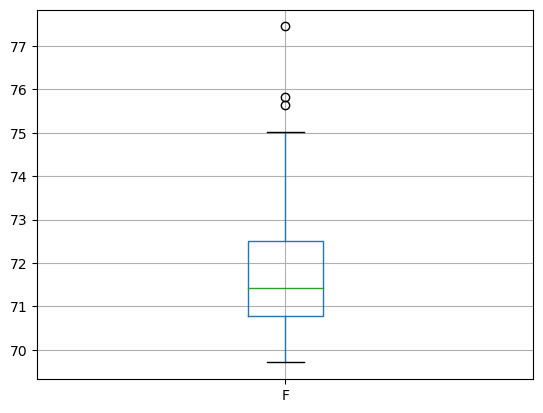

In [199]:
#print(df.boxplot(column=['F', 'C']))
df[['F']].boxplot()
plt.show()

4. Create a plot of temperature over time with `matplotlib`. 

Import the library with `import matplotlib.pyplot as plt`. The `plot()` method creates a line graphs of temperature over time. Use `plt.plot(df['x_col'],df['y_col'],marker='h')` then `plt.show()` to create your plot of temperature over time. 

Before `plt.show()`, add the following methods to modify your graph. Remember, **good graphs always have axis labels, a title, clear units etc.**

```
plt.xlabel('') # labels the x-axis
plt.ylabel('') # labels the y-axis
plt.title('') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
```

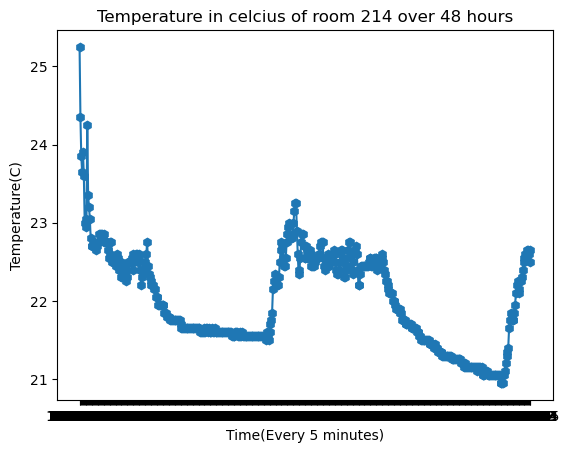

In [200]:
#print(df.boxplot())
plt.plot(df['time'],df['C'],marker='h')
plt.title("Temperature in celcius of room 214 over 48 hours")
plt.xlabel('Time(Every 5 minutes)')
plt.ylabel('Temperature(C)')
plt.show()

5. Define a new column called `kelvin` which is your `celsius` column + 273.15. 

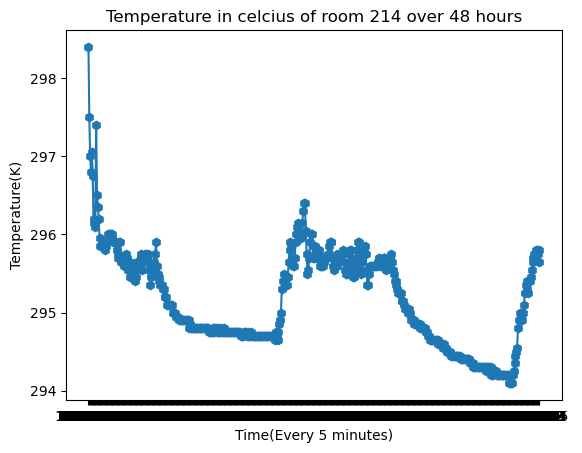

In [201]:
df['kelvin'] = df['C'] + 273.15
plt.plot(df['time'],df['kelvin'], marker='h')
plt.xlabel('Time(Every 5 minutes)')
plt.title("Temperature in celcius of room 214 over 48 hours")
plt.ylabel('Temperature(K)')
plt.show()

6. Get the record(row) at 2:30PM 


In [202]:

df.loc[df['time'] == '14:31:16 ']


,time,date,C,F,H,kelvin
317,14:31:16,2025-01-30,22.6,72.68,15.35,295.75


# Problem 2: Population Data

In this example we will fetch data about countries and their predicted populations from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [203]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")

mat = []

for t in tr:
    lst = [item.strip() for item in t.text.split("\n") if item.strip() != ""] 
    arr = []

    for l in lst:
        try: 
            arr.append(int(l.replace("\xa0", "").replace(",", ""))) 
        except ValueError:
            arr.append(l.strip())  

    if arr:
        arr = arr[:2] + arr[2::2] 
        mat.append(arr)

titles = [str(title) for title in mat[0]]
titles[0] = "countries"  

mat = mat[1:]  

df_a = pd.DataFrame.from_records(mat, columns=titles)

for col in df_a.columns[1:]:
    df_a[col] = pd.to_numeric(df_a[col], errors="coerce") 

df_a = pd.DataFrame.from_records(mat, columns=titles) 


1. A 5 number summary of `df_a`

In [204]:
df_a.describe()

,2024,2030,2100
count,2.580000e+02,2.580000e+02,2.580000e+02
mean,1.409838e+08,1.483421e+08,2.564182e+08
std,6.587727e+08,6.906787e+08,1.679245e+09
min,5.260000e+02,5.610000e+02,1.237000e+03
25%,5.999040e+05,6.259820e+05,6.768595e+05
50%,6.893438e+06,7.254900e+06,8.156020e+06
75%,3.483818e+07,3.830878e+07,5.201191e+07
max,8.118836e+09,8.546141e+09,2.290128e+10


2. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [205]:
df_a.set_index(df_a['countries'],inplace=True)

3. What is the largest population listed for 2030?

In [206]:
print(df_a['2030'].max())

8546141000


4. What was the population of Austria from now to 2100?

In [207]:
#print(df_a[2024].max())
#print(df_a[2100].max())
a = df_a.loc[df_a['countries'] == 'Austria']
print(a)

          countries     2024     2030     2100
countries                                     
Austria     Austria  9120813  9080346  7399328


5. What will the population be of France in 2030?

In [208]:
a = df_a.loc[df_a['countries'] == 'France', '2030']
#print(a)
print(a)


countries
France    65543452
Name: 2030, dtype: int64


6. What 5 entries will have the highest population in 2100? Display their records.

In [209]:
df_a['2100'].head()

countries
World                          22901278109
Asia                           12902801109
Africa                          3924421000
Sub-Saharan Africa              3442347000
Central Asia and South Asia     2559659000
Name: 2100, dtype: int64

7. What was country with the smallest population in 2024?

In [210]:
min = df_a['2024'].min()
df_a.loc[df_a['2024'] == min, 'countries']

countries
Vatican City    Vatican City
Name: countries, dtype: object

8. Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 2024-2100. Your graph needs to include a  proper title, axis labels, and legend.

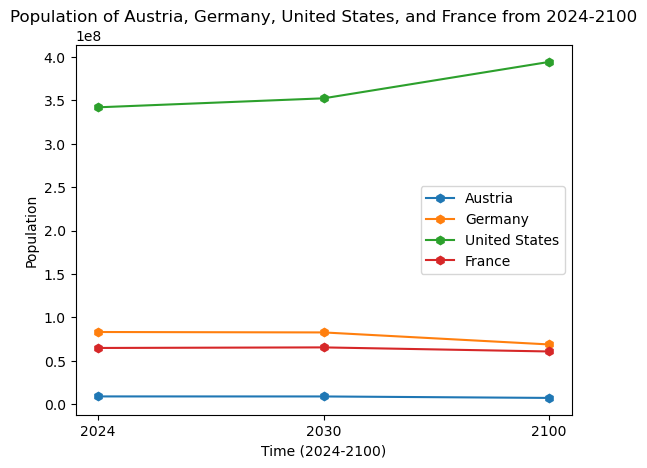

In [213]:
#plt.plot(df_a['countries'] == 'France')
x = ["2024", "2030", "2100"]

plt.plot(x, df_a.loc["Austria", x],marker='h', label='Austria')
plt.plot(x, df_a.loc['Germany', x],marker='h', label='Germany')
plt.plot(x, df_a.loc['United States', x],marker='h', label='United States')
plt.plot(x, df_a.loc['France', x],marker='h', label='France')

plt.plot()


plt.title("Population of Austria, Germany, United States, and France from 2024-2100")
plt.xlabel('Time (2024-2100)')
plt.ylabel('Population')
plt.legend()
plt.show()
#plt.plot(df['x_col'],df['y_col'],marker='h')